In [21]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = ((X / 255.) - .5) * 2
X=X.iloc[:, :2].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [23]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=15, 
                                    random_state=1)
tree_model.fit(X_train_std, y_train)

y_pred = tree_model.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print(y_pred)
print(tree_model.score(X_test_std, y_test))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 18637
[1 1 1 ... 1 1 1]
0.11252380952380953
Accuracy: 0.113


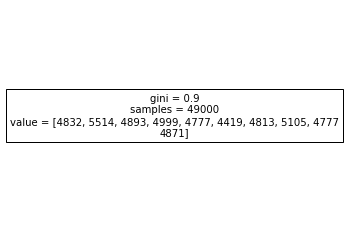

In [24]:
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('images/03_21_1.pdf')
plt.show()